In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from src.gameSimulation.GameUr import GameSettings
from src.helpers import labelLine,draw_squares,draw_circles,draw_stars,draw_path,draw_fives,draw_4fives,draw_4eyes,draw_steps
import gameBoardDisplay as gbd

from scipy import stats


# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.collections as collections
import matplotlib.patches as mpatches
import matplotlib.axes as maxes

from matplotlib import patheffects


mplstyle.use('fast')
mplstyle.use('default')

# mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [10, 20]


font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


In [10]:
def draw_gameboard(ax,noEnd=False, rotate=False,dimitry=False,clear=False):
    if rotate:
        draw_squares(ax,[1,2,3,4],[0,2],"prepare",clear)
        draw_squares(ax,list(range(1,9)),[1],"fight",clear)
        if dimitry:
            draw_squares(ax,[7,8],[0,2],"fight",clear)
        else:
            draw_squares(ax,[7,8],[0,2],"retreat",clear)
        draw_stars(ax,[1,7],[0,2])
        draw_stars(ax,[4],[1])
        if not clear:
            draw_circles(ax,[5],[0,2],"start")
            if not noEnd:
                draw_circles(ax,[6],[0,2],"end")

In [11]:
def formatAxis(ax,xlim,ylim,xticksRange=(0,9)):
    ax.set_yticks([0, 1, 2], ["A", "B", "C"])
    ax.set_xticks(range(*xticksRange),range(xticksRange[0]-1,xticksRange[1]-1))
    ax.set_aspect("equal", "box")
    ax.set_ylim(*ylim)
    ax.set_xlim(*xlim)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")

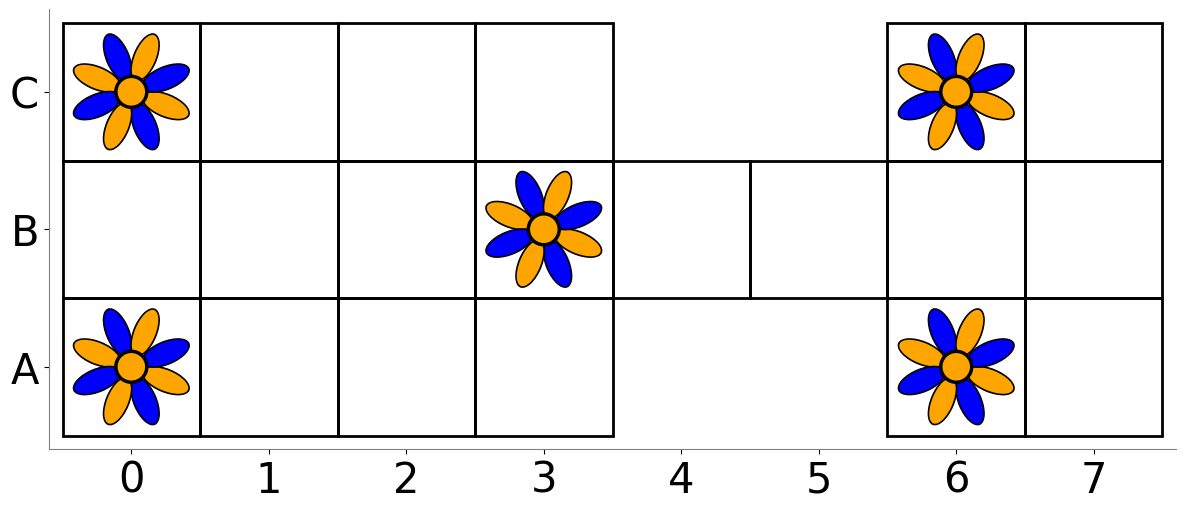

In [12]:
figGB, ax = plt.subplot_mosaic([["p0"]], figsize=[15, 5], constrained_layout=True)
draw_gameboard(ax["p0"],rotate=True,clear=True)
formatAxis(ax["p0"],(.4,8.6),(-0.6,2.6))

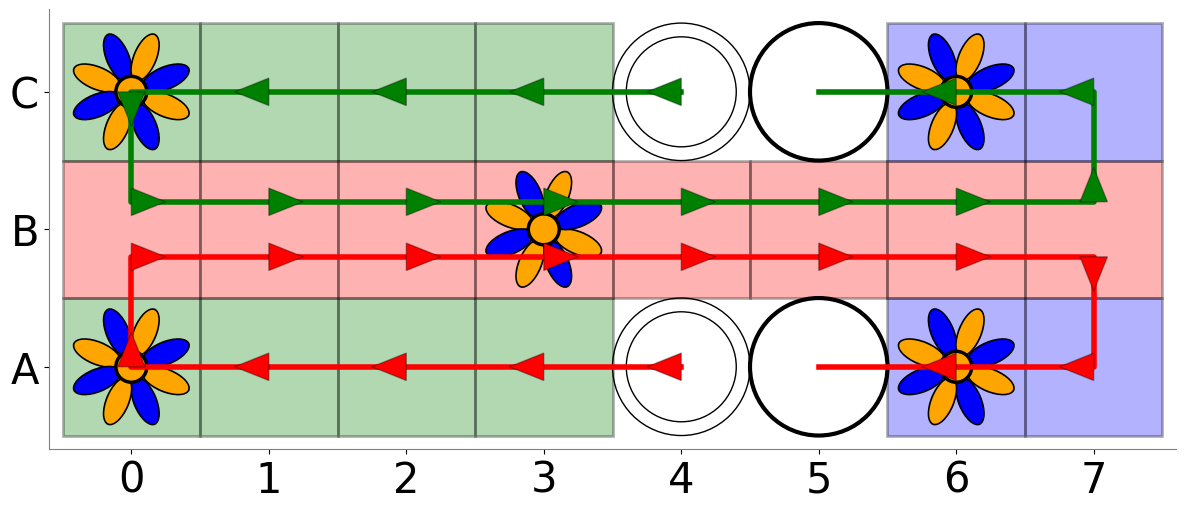

In [13]:
figA, ax = plt.subplot_mosaic([["p0"]], figsize=[15, 5], constrained_layout=True)

draw_gameboard(ax["p0"],rotate=True)
x = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
y = [5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6]

x0 = x[:5] + [x_ - 0.2 for x_ in x[5:13]] + x[13:]
x1 = [x_ + 2 for x_ in x[:5]] + [x_ + 0.2 for x_ in x[5:13]] + [x_ + 2 for x_ in x[13:]]
draw_path(ax["p0"], y, x0, "red")
draw_path(ax["p0"], y, x1, "green")

formatAxis(ax["p0"],(.4,8.6),(-0.6,2.6))




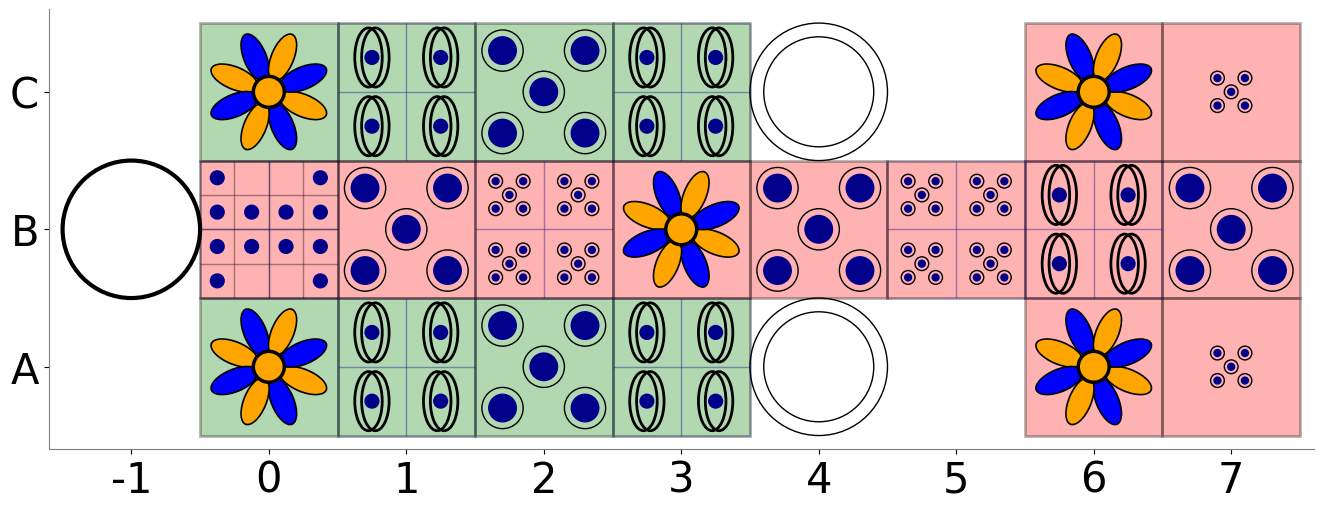

In [14]:
figB, ax = plt.subplot_mosaic([["p0"]], figsize=[15, 5], constrained_layout=True)

draw_gameboard(ax["p0"],noEnd=True,rotate=True,dimitry=True)
draw_circles(ax["p0"],0,1,"end")

x = [0,0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,2,1,1,1,1,1,1,1,1]
y = [5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 8,7,7,6,5,4,3,2,1,0]

x0 = x[:5] + [x_ - 0.2 for x_ in x[5:12]]+x[12:17] + [x_ + 0.2 for x_ in x[17:]]

# draw_path(ax["p0"],y, x0, "red")
# draw_circles(ax["p0"],8,1,"turn")
draw_fives(ax["p0"],8,[0,2],"small")
draw_fives(ax["p0"],3,[0,2],"normal")
draw_fives(ax["p0"],[2,5,8],1,"normal")
draw_4fives(ax["p0"],[3,6],1)
draw_4eyes(ax["p0"],[2,4],[0,2])
draw_4eyes(ax["p0"],7,1)
draw_steps(ax["p0"],1,1)

formatAxis(ax["p0"],(-.6,8.6),(-0.6,2.6))

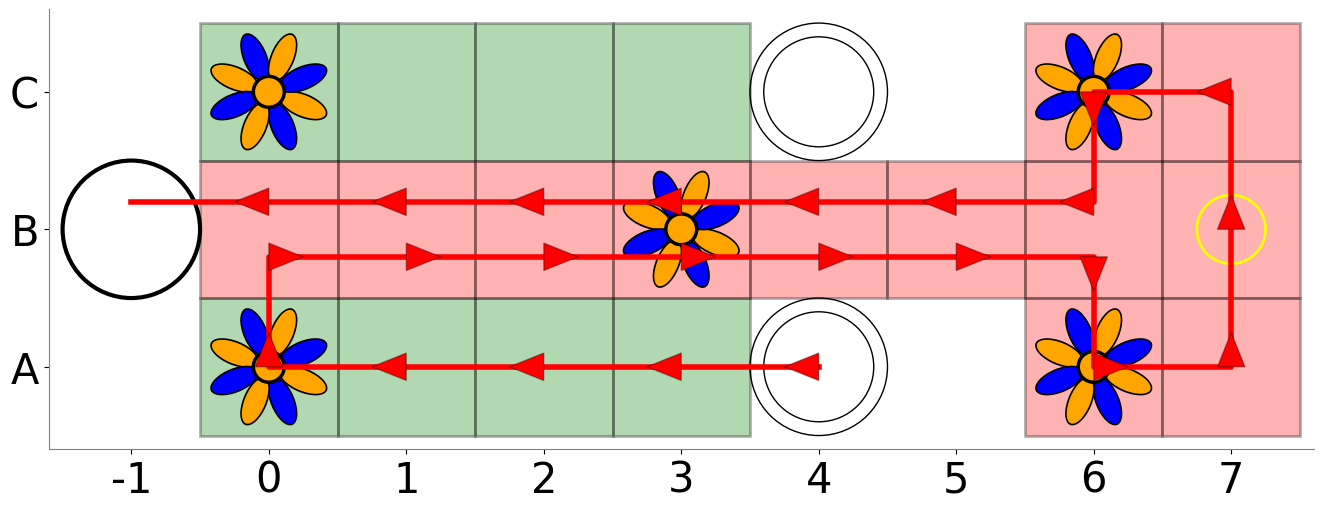

In [18]:
figC, ax = plt.subplot_mosaic([["p0"]], figsize=[15, 5], constrained_layout=True)

draw_gameboard(ax["p0"],noEnd=True,rotate=True,dimitry=True)
draw_circles(ax["p0"],0,1,"end")

x = [0,0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,2,1,1,1,1,1,1,1,1]
y = [5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 8,7,7,6,5,4,3,2,1,0]

x0 = x[:5] + [x_ - 0.2 for x_ in x[5:12]]+x[12:17] + [x_ + 0.2 for x_ in x[17:]]

draw_path(ax["p0"],y, x0, "red")
draw_circles(ax["p0"],8,1,"turn")
# draw_fives(ax["p0"],8,[0,2],"small")
# draw_fives(ax["p0"],3,[0,2],"normal")
# draw_fives(ax["p0"],[2,5,8],1,"normal")
# draw_4fives(ax["p0"],[3,6],1)
# draw_4eyes(ax["p0"],[2,4],[0,2])
# draw_4eyes(ax["p0"],7,1)
# draw_steps(ax["p0"],1,1)

formatAxis(ax["p0"],(-.6,8.6),(-0.6,2.6))

In [19]:
figGB.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/Gameboard.png",dpi=300,)
figA.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/simplePathGameboard.png",dpi=300,)
figB.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/DimitryGameboard.png",dpi=300,)
figC.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/DimitryPathGameboard.png",dpi=300,)

In [20]:
x=[-1,1]*2
y=[-1]*2+[1]*2
list(zip(x,y))

[(-1, -1), (1, -1), (-1, 1), (1, 1)]